In [16]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogLocator, ScalarFormatter

Plote do distribuition  make for the reply

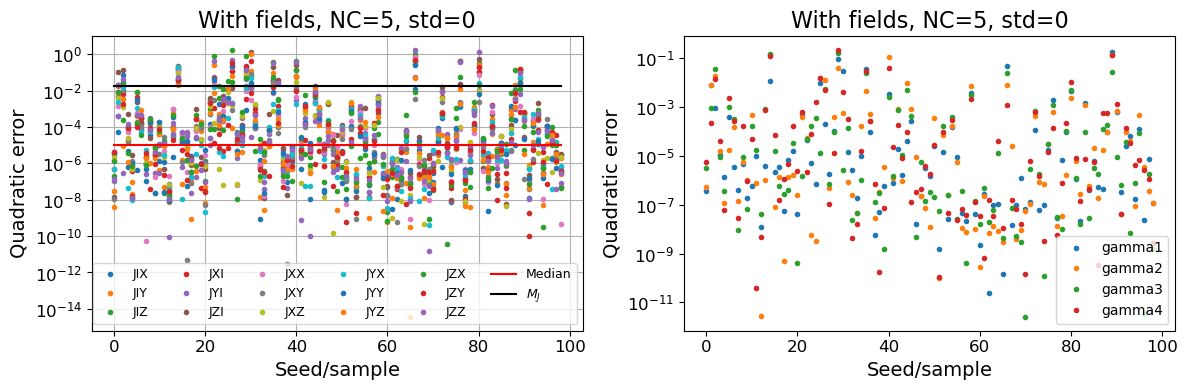

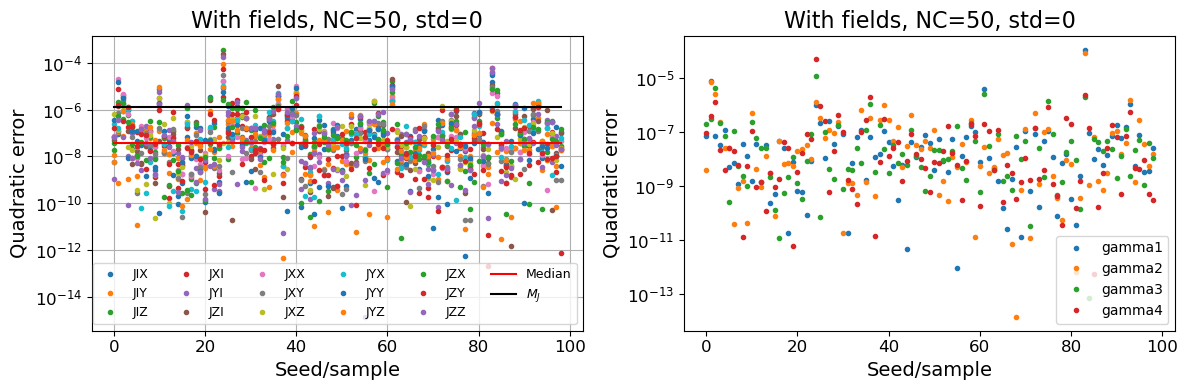

In [17]:
# Parâmetros do range de N_c
Nc_values       = [5,50]#[5,10,15,20,25,30,35,40,45,50]  # Apenas N=50
parametros_gamma= ['gamma1', 'gamma2', 'gamma3', 'gamma4']
parametros_J    = ['JIX','JIY','JIZ','JXI','JYI','JZI','JXX', 'JXY', 'JXZ', 'JYX', 'JYY', 'JYZ', 'JZX', 'JZY', 'JZZ']

for N in Nc_values:
    # Armazenar todos os pontos individuais
    all_gamma_points = {g: [] for g in parametros_gamma}
    all_js_points    = {j: [] for j in parametros_J}

    
    for i in range(1, 100):
        caminho         = f'/home/gubio/CODESPACE/Pinn-inverse-for-opem-quantum-system/With fields/raw_data/parametro_withfields_N{N}_seed{i}_std0.csv'
        df              = pd.read_csv(caminho, index_col=0)
        valor_real      = df['treino'].str.strip('[]').astype(float)
        valor_previsto  = df['previsto'].str.strip('[]').astype(float)
        erro_abs        = np.abs(valor_real - valor_previsto)**2

        for g in parametros_gamma:
            all_gamma_points[g].append(erro_abs[g])
        for j in parametros_J:
            all_js_points[j].append(np.array(erro_abs[j]))

    # Gráfico combinado: J (esquerda) e gammas (direita)
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False)

    # Subplot J
    for j in parametros_J:
        axes[0].plot(all_js_points[j], '.', label=j, markersize=6)

    seed_count = np.arange(len(all_js_points[j]))
    # Flatten all J points into a single array
    all_j_values = []
    for j in parametros_J:
        all_j_values.extend(all_js_points[j])
    value_mean = np.ones(len(all_js_points[j])) * np.mean(all_j_values)
    value_mediana = np.ones(len(all_js_points[j])) * np.median(all_j_values)
    axes[0].plot(seed_count, value_mediana, 'r-',label='Median')
    axes[0].plot(seed_count, value_mean, 'k-',label=r'$M_{J}$')
    
    axes[0].grid(True)
    axes[0].set_title(f'With fields, NC={N}, std=0', fontsize=16)
    axes[0].set_yscale('log')
    axes[0].set_xlabel('Seed/sample', fontsize=14)
    axes[0].set_ylabel('Quadratic error', fontsize=14)
    axes[0].tick_params(axis='both', which='major', labelsize=12)
    axes[0].legend(fontsize=9, loc='lower right', ncol=6)

    # Subplot gammas
    for g in parametros_gamma:
        axes[1].plot(all_gamma_points[g], '.', label=g, markersize=6)
    seed_count = np.arange(len(all_gamma_points[g]))
    # Flatten all gamma points into a single array



    axes[1].set_title(f'With fields, NC={N}, std=0', fontsize=16)
    axes[1].set_yscale('log')
    axes[1].set_xlabel('Seed/sample', fontsize=14)
    axes[1].set_ylabel('Quadratic error', fontsize=14)
    axes[1].tick_params(axis='both', which='major', labelsize=12)
    axes[1].legend(fontsize=10, loc='lower right')

    plt.tight_layout()
    plt.savefig(f'figure_reply_distribution_withfields_N{N}_std0.png', dpi=500)
    plt.show()